In [10]:
!pip install opencv-python
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np


In [17]:
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
          const div = document.createElement('div');
          const capture = document.createElement('button');
          capture.textContent = '📸 Capture Photo';
          div.appendChild(capture);

          const video = document.createElement('video');
          video.style.display = 'block';
          div.appendChild(video);
          document.body.appendChild(div);

          const stream = await navigator.mediaDevices.getUserMedia({video: true});
          video.srcObject = stream;
          await video.play();

          // Wait for user to press button
          await new Promise((resolve) => capture.onclick = resolve);

          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);
          stream.getTracks().forEach(track => track.stop());

          const dataUrl = canvas.toDataURL('image/jpeg', quality);
          div.remove();
          return dataUrl;
        }
    ''')
    display(js)
    data = eval_js('takePhoto({quality: %f})' % quality)
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

photo_filename = take_photo()
print("✅ Photo captured and saved as:", photo_filename)


<IPython.core.display.Javascript object>

✅ Photo captured and saved as: photo.jpg


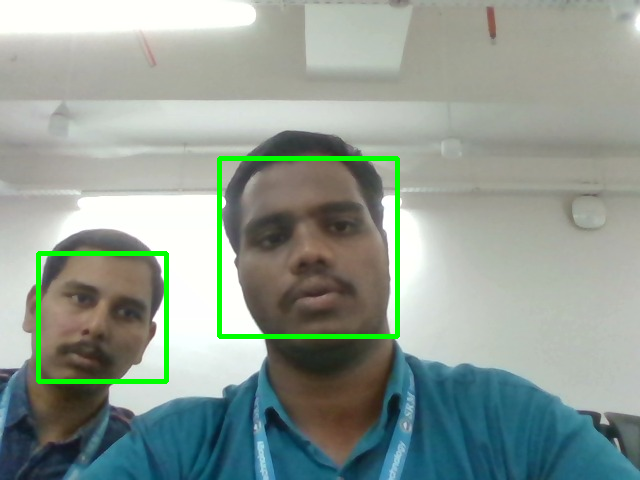

In [18]:
# Load image
img = cv2.imread(photo_filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 5)

# Draw green square around faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)

# Show output
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
